A.1 - Total de Vendas por Canal (Último Trimestre)


,canal_aquisicao,valor_total
1,Outbound,402837.59
0,Inbound,373365.54


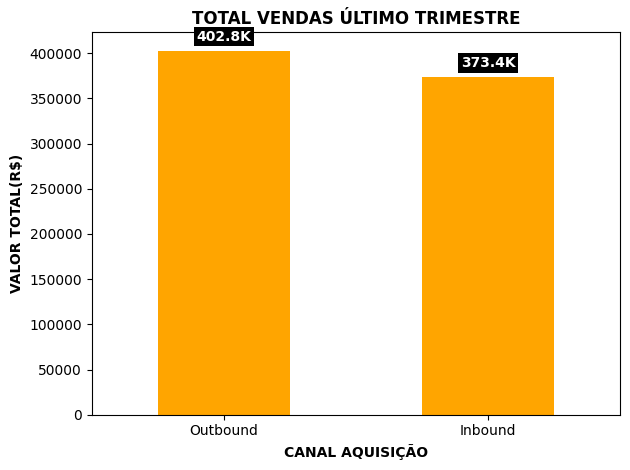


A.2 - Top 5 Produtos por Volume e Margem Média


,id_produto,nome_produto,volume,avg_margin
16,17,Imersão - Aliquam,276,0.169987
19,20,Station AI - Harum,258,0.480001
3,4,Station AI - Dolorem,251,0.290033
20,21,High Growth - Nisi,251,0.400003
9,10,Growth Way - Modi,242,0.470013


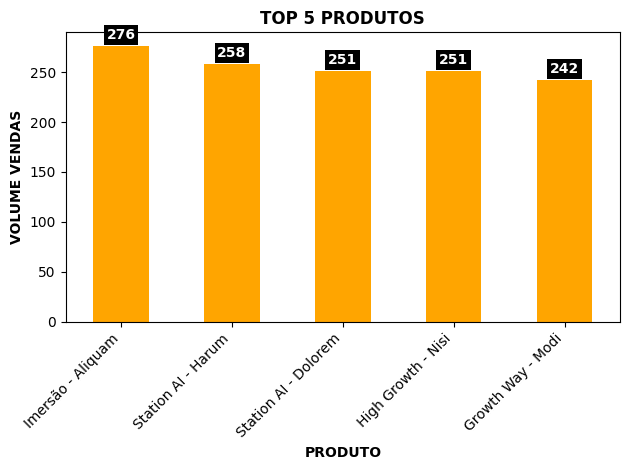


A.3 - Ticket Médio por Segmento


,segmento,valor_total
0,B2B,2476.401466
1,B2C,2459.734676


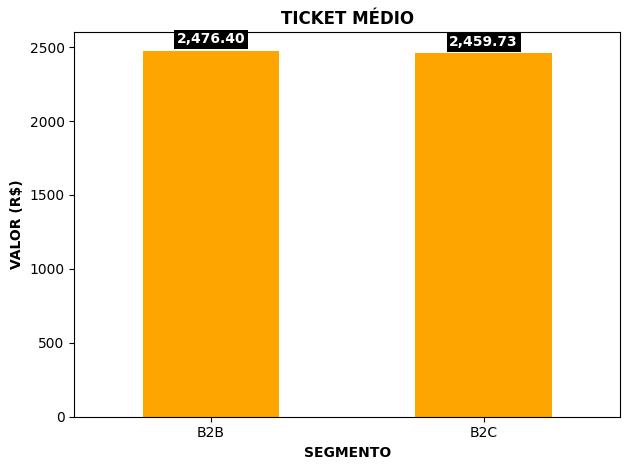


A.4 - Vendas Mensais


,year_month,valor_total,mes_abrev
0,2025-01-01,250943.09,Jan
1,2025-02-01,84476.61,Fev
2,2025-03-01,112315.37,Mar
3,2025-04-01,260171.73,Abr
4,2025-05-01,125152.49,Mai
5,2025-06-01,216617.25,Jun
6,2025-07-01,348282.93,Jul
7,2025-08-01,153385.02,Ago
8,2025-09-01,274535.18,Set
9,2025-10-01,281580.93,Out


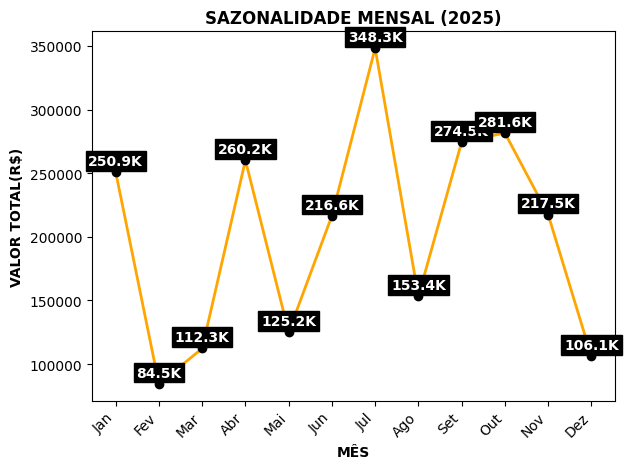


B.1 - Eficiência de Campanhas


,nome_campanha,total_interacoes,conversoes,conversion_rate,orcamento,custo,custo_por_conversao
0,Campanha Velit,699,80,0.114449,10168.22,2988.19,37.352375
1,Campanha Quam,734,80,0.108992,14307.26,16227.62,202.845250
2,Campanha Facilis,742,59,0.079515,18522.42,7259.41,123.040847
3,Campanha Sunt,786,89,0.113232,18442.84,6574.57,73.871573
4,Campanha Temporibus,766,58,0.075718,2626.23,1524.82,26.290000
5,Campanha Odio,686,73,0.106414,19596.79,21774.87,298.285890
6,Campanha Nobis,749,90,0.120160,1606.62,1595.67,17.729667
7,Campanha Libero,778,87,0.111825,14551.62,1653.04,19.000460
8,Campanha Recusandae,725,69,0.095172,18100.50,10403.76,150.779130
9,Campanha Esse,793,77,0.097100,7460.03,5966.11,77.481948


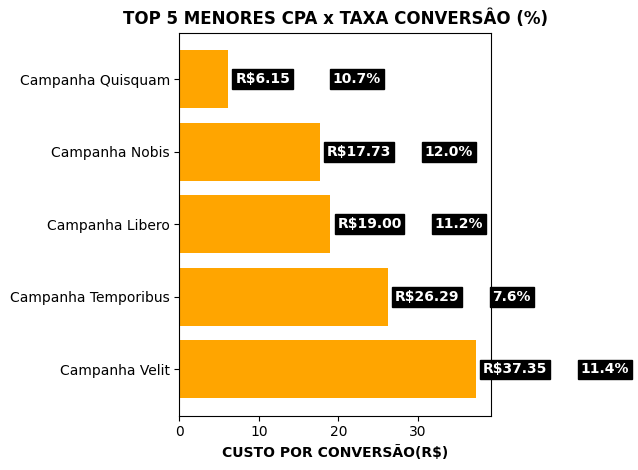


B.2 - Engajamento por Canal de Marketing


,canal_marketing,interacoes
2,Meta Ads,6666
0,Email,4587
1,Google Ads,3747


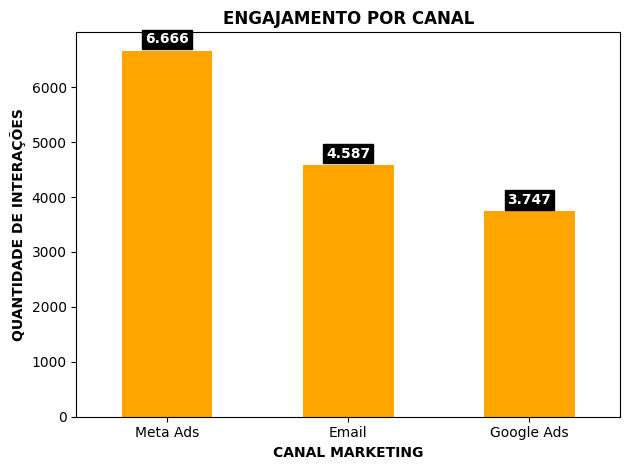

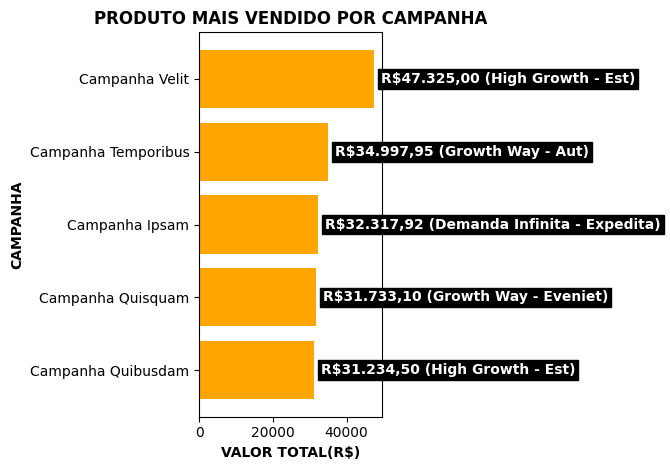

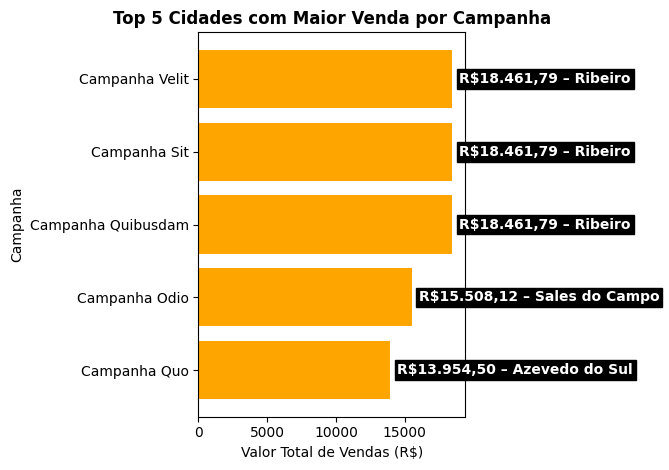

Repeat Purchase Rate: 31.16% (220 de 706 clientes)


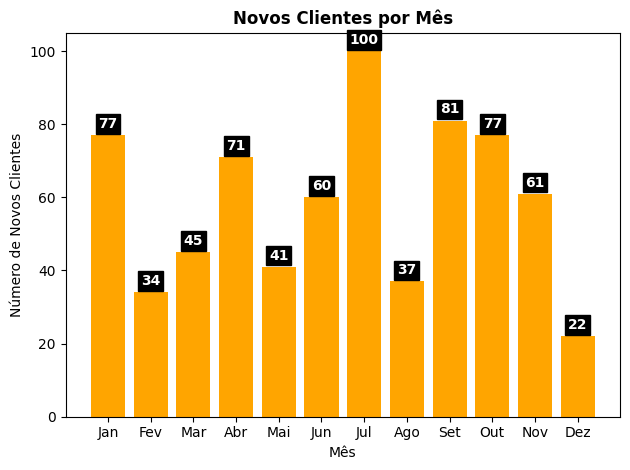

In [71]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import display

# Conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\lucas\Downloads\Teste Growth\vendas_marketing.db')

# Carregar tabelas
clientes = pd.read_sql('SELECT * FROM Clientes', conn)
campanhas = pd.read_sql(
    'SELECT * FROM Campanhas_Marketing', conn,
    parse_dates=['data_inicio', 'data_fim']
)
interacoes = pd.read_sql(
    'SELECT * FROM Interacoes_Marketing', conn,
    parse_dates=['data_interacao']
)
produtos = pd.read_sql('SELECT * FROM Produtos', conn)
vendas = pd.read_sql(
    'SELECT * FROM Vendas', conn,
    parse_dates=['data_venda']
)

# A.1 Total de Vendas por Canal (Último Trimestre)
max_date = vendas['data_venda'].max()
year, month = max_date.year, max_date.month
quarter = (month - 1) // 3 + 1
if quarter == 1:
    last_q, last_q_year = 4, year - 1
else:
    last_q, last_q_year = quarter - 1, year
start_month = 3 * (last_q - 1) + 1
start_date = pd.Timestamp(year=last_q_year, month=start_month, day=1)
end_date = (pd.Timestamp(year=last_q_year, month=start_month + 2, day=1)
            + pd.offsets.MonthEnd(0))

vendas_lq = vendas[
    (vendas['data_venda'] >= start_date) &
    (vendas['data_venda'] <= end_date)
]
sales_by_channel = (
    vendas_lq
    .groupby('canal_aquisicao')['valor_total']
    .sum()
    .reset_index()
    .sort_values('valor_total', ascending=False)
)

print("A.1 - Total de Vendas por Canal (Último Trimestre)")
display(sales_by_channel)

fig, ax = plt.subplots()
sales_by_channel.plot(
    kind='bar',
    x='canal_aquisicao',
    y='valor_total',
    legend=False,
    color='orange',
    ax=ax
)

# labels do eixo X na horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

ax.set_title('TOTAL VENDAS ÚLTIMO TRIMESTRE',fontweight='bold' )
ax.set_xlabel('CANAL AQUISIÇÃO', fontweight='bold')
ax.set_ylabel('VALOR TOTAL(R$)', fontweight='bold')

# adiciona rótulos formatados
for bar in ax.patches:
    h = bar.get_height()
    # formata em K/M
    if h >= 1_000_000:
        label = f"{h/1_000_000:.1f}M"
    elif h >= 1_000:
        label = f"{h/1_000:.1f}K"
    else:
        label = f"{h:.0f}"
    # anotar com offset e bbox
    ax.annotate(
        label,
        xy=(bar.get_x() + bar.get_width()/2, h),
        xytext=(0, 5),               # 5 pontos acima da barra
        textcoords="offset points",
        ha="center", va="bottom",
        color="white",
        fontweight = "bold",
        bbox=dict(
            facecolor="black",
            edgecolor="none",
            pad=2                   # espaçamento interno da caixa
        )
    )

plt.tight_layout()
plt.show()

# A.2 Top 5 Produtos por Volume de Vendas e Margem de Lucro Média
vendas_prod = vendas.merge(
    produtos[['id_produto', 'nome_produto', 'custo_unitario']],
    on='id_produto'
)
vendas_prod['preco_venda_unit'] = (
    vendas_prod['valor_total'] / vendas_prod['quantidade']
)
vendas_prod['margin'] = (
    (vendas_prod['preco_venda_unit'] - vendas_prod['custo_unitario'])
    / vendas_prod['preco_venda_unit']
)
top_products = (
    vendas_prod
    .groupby(['id_produto', 'nome_produto'])
    .agg(volume=('quantidade', 'sum'),
         avg_margin=('margin', 'mean'))
    .reset_index()
)
top5 = top_products.nlargest(5, 'volume')

print("\nA.2 - Top 5 Produtos por Volume e Margem Média")
display(top5)
fig, ax = plt.subplots()
top5.plot(
    kind='bar',
    x='nome_produto',
    y='volume',
    legend=False,
    color='orange',
    ax=ax
)

ax.set_title('TOP 5 PRODUTOS', fontweight='bold')
ax.set_xlabel('PRODUTO', fontweight='bold')
ax.set_ylabel('VOLUME VENDAS', fontweight='bold')

# X labels inclinados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 2) Rótulo de dados em cada coluna, fundo preto, texto branco e negrito
for bar in ax.patches:
    height = bar.get_height()
    label = f"{height:,.0f}"
    ax.annotate(
        label,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),               # desloca 3 pts para cima
        textcoords="offset points",
        ha="center", va="bottom",
        color="white",
        fontweight="bold",
        bbox=dict(
            facecolor="black",
            edgecolor="none",
            pad=2
        )
    )

plt.tight_layout()
plt.show()

# A.3 Ticket Médio por Segmento (B2B vs B2C)
vendas_cli = vendas.merge(
    clientes[['id_cliente', 'segmento']],
    on='id_cliente'
)
avg_ticket = (
    vendas_cli
    .groupby('segmento')['valor_total']
    .mean()
    .reset_index()
    .sort_values('valor_total', ascending=False)
)

print("\nA.3 - Ticket Médio por Segmento")
display(avg_ticket)

# plot no mesmo estilo das outras seções
fig, ax = plt.subplots()
avg_ticket.plot(
    kind='bar',
    x='segmento',
    y='valor_total',
    legend=False,
    color='orange',  # barras laranja
    ax=ax
)

# título em negrito
ax.set_title('TICKET MÉDIO', fontweight='bold')
ax.set_xlabel('SEGMENTO', fontweight='bold')
ax.set_ylabel('VALOR (R$)', fontweight='bold')

# labels do eixo X na horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# rótulo de dados em cada barra (fundo preto, texto branco e negrito)
for bar in ax.patches:
    height = bar.get_height()
    label = f"{height:,.2f}"  # com duas casas decimais
    ax.annotate(
        label,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),               # 3 pontos acima da barra
        textcoords="offset points",
        ha="center", va="bottom",
        color="white",
        fontweight="bold",
        bbox=dict(facecolor="black", edgecolor="none", pad=2)
    )

plt.tight_layout()
plt.show()

# A.4 Sazonalidade: Vendas Mensais (gráfico customizado)
# cria mapeamento de mês → abreviação em Português
month_map = {
    1: 'Jan',  2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai',  6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

# prepara dados
vendas['year_month'] = vendas['data_venda'].dt.to_period('M').dt.to_timestamp()
monthly_sales = (
    vendas
    .groupby('year_month')['valor_total']
    .sum()
    .reset_index()
)
monthly_sales['mes_abrev'] = monthly_sales['year_month'].dt.month.map(month_map)

print("\nA.4 - Vendas Mensais")
display(monthly_sales[['year_month','valor_total','mes_abrev']])

# função de formatação K/M
def fmt_km(v):
    if v >= 1e6:
        return f"{v/1e6:.1f}M"
    elif v >= 1e3:
        return f"{v/1e3:.1f}K"
    else:
        return f"{v:.0f}"

# plota
fig, ax = plt.subplots()
x = range(len(monthly_sales))
y = monthly_sales['valor_total'].values
labels = monthly_sales['mes_abrev'].values

ax.plot(
    x, y,
    color='orange',
    marker='o',
    markerfacecolor='black',
    markeredgecolor='black',
    linewidth=2
)

# configurações de layout
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title('SAZONALIDADE MENSAL (2025)', fontweight='bold')
ax.set_xlabel('MÊS', fontweight='bold')
ax.set_ylabel('VALOR TOTAL(R$)', fontweight='bold')

# anotações formatadas sobre cada ponto
for i, v in enumerate(y):
    ax.annotate(
        fmt_km(v),
        xy=(i, v),
        xytext=(0, 3),                # 3 pts acima do ponto
        textcoords='offset points',
        ha='center', va='bottom',
        color='white',
        fontweight='bold',
        bbox=dict(facecolor='black', pad=2)
    )

plt.tight_layout()
plt.show()

# B.1 Eficiência das Campanhas
total_interactions = (
    interacoes
    .groupby('id_campanha')
    .size()
    .rename('total_interacoes')
)
conversions = (
    interacoes[interacoes['tipo_interacao'] == 'Conversão']
    .groupby('id_campanha')
    .size()
    .rename('conversoes')
)
camp_eff = (
    campanhas.set_index('id_campanha')
    .join(total_interactions)
    .join(conversions)
    .fillna(0)
)
camp_eff['conversion_rate'] = (
    camp_eff['conversoes'] / camp_eff['total_interacoes']
)
camp_eff['custo_por_conversao'] = (
    camp_eff['custo'] / camp_eff['conversoes']
).replace({0: pd.NA})
camp_eff_summary = camp_eff[
    ['nome_campanha', 'total_interacoes', 'conversoes',
     'conversion_rate', 'orcamento', 'custo', 'custo_por_conversao']
].reset_index(drop=True)

print("\nB.1 - Eficiência de Campanhas")
display(camp_eff_summary)

# Ordena crescentemente por custo por conversão
df_ord = camp_eff_summary.sort_values('custo_por_conversao', ascending=True).head(5)

fig, ax = plt.subplots()

# Barras horizontais laranja
bars = ax.barh(
    df_ord['nome_campanha'],
    df_ord['custo_por_conversao'],
    color='orange'
)
ax.invert_yaxis()  # coloca menor custo no topo

# Título e rótulos
ax.set_title('TOP 5 MENORES CPA x TAXA CONVERSÂO (%)', fontweight='bold')
ax.set_xlabel('CUSTO POR CONVERSÃO(R$)', fontweight='bold')

# Anotações: custo e taxa lado a lado
for bar, cost, rate in zip(bars,
                           df_ord['custo_por_conversao'],
                           df_ord['conversion_rate']):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    cost_label = f"R${cost:,.2f}"
    rate_label = f"{rate:.1%}"

    # 1) rótulo de custo
    ax.annotate(
        cost_label,
        xy=(x, y),
        xytext=(5, 0),             # 5 pts à direita da barra
        textcoords="offset points",
        ha="left", va="center",
        color="white", fontweight="bold",
        bbox=dict(facecolor="black", pad=2)
    )
    # 2) rótulo de taxa de conversão
    ax.annotate(
        rate_label,
        xy=(x, y),
        xytext=(75, 0),            # 75 pts à direita da barra
        textcoords="offset points",
        ha="left", va="center",
        color="white", fontweight="bold",
        bbox=dict(facecolor="black", pad=2)
    )

plt.tight_layout()
plt.show()

# B.2 Engajamento por Canal de Marketing
inter_canal = interacoes.merge(
    campanhas[['id_campanha', 'canal_marketing']],
    on='id_campanha'
)
engagement_by_channel = (
    inter_canal
    .groupby('canal_marketing')
    .size()
    .rename('interacoes')
    .reset_index()
    .sort_values('interacoes', ascending=False)
)
print("\nB.2 - Engajamento por Canal de Marketing")
display(engagement_by_channel)
fig, ax = plt.subplots()
# 1) Barras laranjas
engagement_by_channel.plot(
    kind='bar',
    x='canal_marketing',
    y='interacoes',
    legend=False,
    color='orange',
    ax=ax
)

# 2) Rótulos do eixo X na horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Título e eixos
ax.set_title('ENGAJAMENTO POR CANAL', fontweight='bold')
ax.set_ylabel('QUANTIDADE DE INTERAÇÕES', fontweight='bold')
ax.set_xlabel('CANAL MARKETING', fontweight='bold')

# 3) Rótulos de dados com fundo preto e texto branco/negrito
for bar in ax.patches:
    height = bar.get_height()
    # formata com separador de milhar e depois troca , por .
    label = f"{height:,.0f}".replace(",", ".")
    ax.annotate(
        label,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center", va="bottom",
        color="white", fontweight="bold",
        bbox=dict(facecolor="black", pad=2)
    )
plt.tight_layout()
plt.show()

# C.1 Produto Mais Vendido em Cada Campanha (barras organizadas decrescentemente)
top_products = []
for _, row in campanhas.iterrows():
    start, end = row['data_inicio'], row['data_fim']
    period_sales = vendas[
        (vendas['data_venda'] >= start) &
        (vendas['data_venda'] <= end)
    ].merge(
        produtos[['id_produto', 'nome_produto']],
        on='id_produto'
    )
    grouped = (
        period_sales
        .groupby(['id_produto', 'nome_produto'])['valor_total']
        .sum()
        .reset_index()
    )
    if not grouped.empty:
        top = grouped.nlargest(1, 'valor_total').iloc[0]
        max_val, prod = top['valor_total'], top['nome_produto']
    else:
        max_val, prod = 0, ''
    top_products.append({
        'campanha': row['nome_campanha'],
        'max_valor': max_val,
        'produto': prod
    })

df_top = pd.DataFrame(top_products)

# 1) Ordena decrescentemente e seleciona só as 5 maiores
df_top = (
    df_top
    .sort_values('max_valor', ascending=False)
    .head(5)
)

fig, ax = plt.subplots()
bars = ax.barh(
    df_top['campanha'],
    df_top['max_valor'],
    color='orange'
)
ax.invert_yaxis()

ax.set_title('PRODUTO MAIS VENDIDO POR CAMPANHA', fontweight='bold')
ax.set_xlabel('VALOR TOTAL(R$)', fontweight='bold')
ax.set_ylabel('CAMPANHA', fontweight='bold')

def fmt_currency(v):
    s = f"{v:,.2f}"
    s = s.replace(",", "X").replace(".", ",").replace("X", ".")
    return f"R${s}"

for bar, val, prod in zip(bars, df_top['max_valor'], df_top['produto']):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = f"{fmt_currency(val)} ({prod})"
    ax.annotate(
        label,
        xy=(x, y), xytext=(5, 0),
        textcoords="offset points",
        ha="left", va="center",
        color="white", fontweight="bold",
        bbox=dict(facecolor="black", pad=2)
    )

plt.tight_layout()
plt.show()

# C.2 Cidades com Maior Venda por Campanha
# 1) Para cada campanha, encontrar a cidade com maior venda no período
top_cities = []
for _, row in campanhas.iterrows():
    start, end = row['data_inicio'], row['data_fim']
    period_sales = (
        vendas[
            (vendas['data_venda'] >= start) &
            (vendas['data_venda'] <= end)
        ]
        .merge(clientes, on='id_cliente')
    )
    grouped = period_sales.groupby('cidade')['valor_total'].sum().reset_index()
    if not grouped.empty:
        top = grouped.nlargest(1, 'valor_total').iloc[0]
        max_val, city = top['valor_total'], top['cidade']
    else:
        max_val, city = 0, ''
    top_cities.append({'campanha': row['nome_campanha'],
                       'max_valor': max_val,
                       'cidade': city})

# 2) Criar DataFrame e selecionar as 5 maiores
df_city_top = (pd.DataFrame(top_cities)
               .sort_values('max_valor', ascending=False)
               .head(5))

# 3) Plot horizontal
fig, ax = plt.subplots()
bars = ax.barh(df_city_top['campanha'], df_city_top['max_valor'], color='orange')
ax.invert_yaxis()

ax.set_title('Top 5 Cidades com Maior Venda por Campanha', fontweight='bold')
ax.set_xlabel('Valor Total de Vendas (R$)')
ax.set_ylabel('Campanha')

# formata R$1.234,56
def fmt_currency(v):
    s = f"{v:,.2f}"
    s = s.replace(",", "X").replace(".", ",").replace("X", ".")
    return f"R${s}"

# 4) Anotar com "R$ valor – cidade"
for bar, val, city in zip(bars, df_city_top['max_valor'], df_city_top['cidade']):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = f"{fmt_currency(val)} – {city}"
    ax.annotate(
        label,
        xy=(x, y),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left', va='center',
        color='white', fontweight='bold',
        bbox=dict(facecolor='black', pad=2)
    )

plt.tight_layout()
plt.show()

# Conta quantas compras cada cliente fez
customer_counts = vendas['id_cliente'].value_counts()

# Número de clientes que compraram mais de uma vez
repeaters = (customer_counts > 1).sum()

# Total de clientes distintos
total_customers = customer_counts.shape[0]

# Taxa de Repeat Purchase Rate
rpr = (repeaters / total_customers) * 100

print(f"Repeat Purchase Rate: {rpr:.2f}% ({repeaters} de {total_customers} clientes)")

# 1) Data da primeira compra de cada cliente
first_purchase = (
    vendas
    .groupby('id_cliente')['data_venda']
    .min()
    .reset_index(name='first_purchase')
)

# 2) Mapeamento de mês em Português
month_map = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

# Extrai ano-mês e abreviação
first_purchase['year_month'] = first_purchase['first_purchase'].dt.to_period('M').dt.to_timestamp()
first_purchase['mes_abrev'] = first_purchase['first_purchase'].dt.month.map(month_map)

# 3) Conta novos clientes por mês
new_customers = (
    first_purchase
    .groupby('mes_abrev')
    .size()
    .reset_index(name='count')
)
# Garantir ordem correta de meses
new_customers['month_num'] = new_customers['mes_abrev'].map({v: k for k, v in month_map.items()})
new_customers = new_customers.sort_values('month_num')

# 4) Plotagem
fig, ax = plt.subplots()
bars = ax.bar(
    new_customers['mes_abrev'], 
    new_customers['count'], 
    color='orange'
)

ax.set_title('Novos Clientes por Mês', fontweight='bold')
ax.set_xlabel('Mês')
ax.set_ylabel('Número de Novos Clientes')

# Anotações sobre barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom',
        color='white', fontweight='bold',
        bbox=dict(facecolor='black', pad=2)
    )

plt.tight_layout()
plt.show()